# Lab 3: Data Cleaning and Seaborn

** If you are not attending lab, this assignment is due 09/12/2017 at 11:59pm (graded on accuracy) **

** If you are attending lab, you do not need to submit the assignment; you just need to get checked off by your TA. **

In this lab, you will be working on the Berkeley Police Department - Calls Data https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5

The data contains some interesting information but you may need to clean it a bit first.

You may find the material in the lecture helpful http://www.ds100.org/fa17/assets/notebooks/04-lec/EDA_and_cleaning.html

## Setup
import the libraries and setup the okpy environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# These lines load the tests.
# !pip install -U okpy

from client.api.notebook import Notebook
ok = Notebook('lab03.ok')

Assignment: Lab 03
OK, version v1.12.10



In [2]:
import os
auth_refresh = os.path.join(os.path.expanduser('~'), '.config', 'ok', 'auth_refresh')
if os.path.exists(auth_refresh):
    os.remove(auth_refresh)
ok.auth(force=True)


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: zH8m6teYQlRzn5gGc64uLhGZIcE2HZ
Successfully logged in as kath.eddinger@berkeley.edu


## Loading Data and simple exploration

In [4]:
calls = pd.read_csv("data/Berkeley_PD_-_Calls_for_Service.csv")
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,17091420,BURGLARY AUTO,07/23/2017 12:00:00 AM,06:00,BURGLARY - VEHICLE,0,08/29/2017 08:28:05 AM,"2500 LE CONTE AVE\nBerkeley, CA\n(37.876965, -...",2500 LE CONTE AVE,Berkeley,CA
1,17020462,THEFT FROM PERSON,04/13/2017 12:00:00 AM,08:45,LARCENY,4,08/29/2017 08:28:00 AM,"2200 SHATTUCK AVE\nBerkeley, CA\n(37.869363, -...",2200 SHATTUCK AVE,Berkeley,CA
2,17050275,BURGLARY AUTO,08/24/2017 12:00:00 AM,18:30,BURGLARY - VEHICLE,4,08/29/2017 08:28:06 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865491, ...",200 UNIVERSITY AVE,Berkeley,CA
3,17019145,GUN/WEAPON,04/06/2017 12:00:00 AM,17:30,WEAPONS OFFENSE,4,08/29/2017 08:27:59 AM,"1900 SEVENTH ST\nBerkeley, CA\n(37.869318, -12...",1900 SEVENTH ST,Berkeley,CA
4,17044993,VEHICLE STOLEN,08/01/2017 12:00:00 AM,18:00,MOTOR VEHICLE THEFT,2,08/29/2017 08:28:05 AM,"100 PARKSIDE DR\nBerkeley, CA\n(37.854247, -12...",100 PARKSIDE DR,Berkeley,CA


First let's check how many records we have.

In [5]:
len(calls)

5508

Then we can go over the fields to see what are their meanings. We can first check if all events happened in Berkeley

In [6]:
calls.groupby(["City","State"]).count()

,,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR
City,State,,,,,,,,,
Berkeley,CA,5508,5508,5508,5508,5508,5508,5508,5508,5481


### Question 1
It seems OFFENSE and CVLEGEND are both about the type of event. What is the difference between the two? Try to use the `groupby` method to group the two keys.

You should be able to see that CVLEGEND is a broader category of crime. For example, there are three sub-categories in OFFENSE that correspond to LARCENY in CVLEGEND. Find them and save the results in `answer1` (should be a list of strings, you may manually type in the answer).

In [12]:
# You may use this cell for your scratch work as long as you enter
# in your final answers in the answer1 variable.

# calls.groupby(["CVLEGEND","OFFENSE"]).count()
answer1 = "THEFT FELONY (OVER $950)" , "THEFT FROM PERSON" , "THEFT MISD. (UNDER $950)"

In [13]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/DkVlyn
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 2

#### Question 2a

What are the five crime types of CVLEGEND that have the most crime events? You may need to use `value_counts` to find the answer. Save your results into `answer2a` as a list of strings

In [17]:
answer2a = "LARCENY", "BURGLARY - VEHICLE", "VANDALISM", "DISORDERLY CONDUCT", "ASSAULT"

In [21]:
# calls["CVLEGEND"].value_counts()

LARCENY                   1102
BURGLARY - VEHICLE        1021
VANDALISM                  438
DISORDERLY CONDUCT         415
ASSAULT                    352
DRUG VIOLATION             328
MOTOR VEHICLE THEFT        308
BURGLARY - RESIDENTIAL     274
FRAUD                      260
ROBBERY                    187
LIQUOR LAW VIOLATION       147
LARCENY - FROM VEHICLE     140
FAMILY OFFENSE             130
BURGLARY - COMMERCIAL      104
MISSING PERSON              96
WEAPONS OFFENSE             77
SEX CRIME                   50
NOISE VIOLATION             46
ARSON                       14
ALL OTHER OFFENSES           9
RECOVERED VEHICLE            8
KIDNAPPING                   1
HOMICIDE                     1
Name: CVLEGEND, dtype: int64

In [19]:
_ = ok.grade('q02a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/kR0LQr
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 2b
Also we can use the `countplot` to plot the distribution of different event types of `CVLEGEND`. 

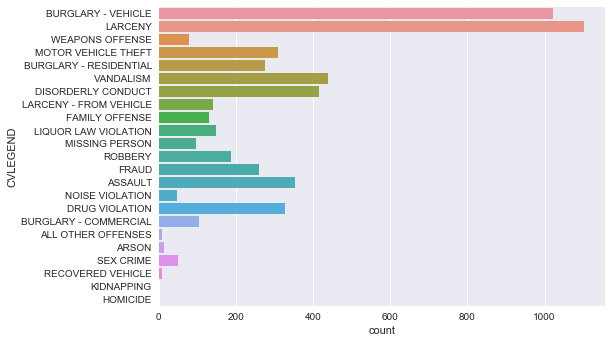

In [20]:
sns.countplot(data=calls,y="CVLEGEND")

However, `countplot` didn't sort the rows according to the count. Try to use `value_counts` and `barplot` to plot a similar graph with the rows sorted according to the count

In [25]:
c = calls["CVLEGEND"].value_counts()
sns.barplot(data=c, y="CVLEGEND")

ValueError: Could not interpret input 'CVLEGEND'

### Question 3a

The CVDOW field isn't named helpfully and it is hard to see the meaning from the data alone. According to the website, CVDOW is actually indicating the day that events happend. 0->Sunday, 1->Monday ... 6->Saturday.  Add a new column `Day` into the `calls` dataframe that has the string weekday (eg. 'Sunday') for the corresponding value in CVDOW.

In [ ]:
days = np.array(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
calls["Day"] = ...

In [ ]:
set(calls["Day"])

In [ ]:
_ = ok.grade('q03a')
_ = ok.backup()

### Question 3b
We can plot the distribution of crime events on different days to see if there are some interesting findings.

In [ ]:
sns.countplot(x="Day",data=calls)

It seems Saturday and Friday have slightly more crimes than the others, while Sunday is the lowest. But the difference is not significant. We can break down into some particular types of events to see their distribution. For example, please make a `countplot` for the "NOISE VIOLATION". Which two days are the peak for "NOISE VIOLATION"? Put your results into `answer3b` as a list of strings. 

In [ ]:
# TODO: make some plots here
...
answer3b = ...

In [ ]:
_ = ok.grade('q03b')
_ = ok.backup()

### Question 3c
There are two more CVLEGEND types that have similar distribution as "NOISE VIOLATION" (peaks are weekends), find both and put your results into the `answer3c` as a list of strings.

In [ ]:
...

In [ ]:
_ = ok.grade('q03c')
_ = ok.backup()

### Question 4a
Now let's look at the EVENTTM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `hour` in the `calls` dataframe. You should save the hour as an int. Then plot the distribution of the `hour` column using `sns.countplot`.

In [ ]:
...

In [ ]:
_ = ok.grade('q04a')
_ = ok.backup()

### Question 4b

Now we can plot the hour distribution for each type of crime in CVLEGEND. Make a plot for "NOISE VIOLATION" and find out which 3 hours contain most of such events. Put your results into `answer4b` as a list of integers.

In [ ]:
answer4b = ...

In [ ]:
_ = ok.grade('q04b')
_ = ok.backup()

### Question 4c
Besides simple BarChart, another useful chart is the box plot. Use `sns.boxplot` to make a vertical boxplot of the hour distribution for each `CVLEGEND`. Each crime category should appear on the y-axis.

In [ ]:
...

### Question 5
Now we turn to the location info of the dataset. The `BLKADDR` column contains information about where the events happened. Let's see if we can find out which road has the most crimes.

First we need to extract the road name from the address. So let's look at the format of the address to see if there are any patterns there.


In [ ]:
calls["BLKADDR"].head(20)

From the samples, we can find out two patterns for the road name: "NUMBER ROADNAME" or "ROAD1 & ROAD2". We can start from here to extract the name of the roads.

### Question 5a
Write a script to create a new column `road` in `calls` to store the road name of the event. For the "ROAD1 & ROAD2" format just use ROAD1.

HINT 1: You should ignore N/A values (leave them unchanged in your result).

HINT 2: Consider using `apply` for this problem if you can't figure out how to use the `str` methods of pandas.

In [ ]:
...

In [ ]:
_ = ok.grade('q05a')
_ = ok.backup()

### Question 5b
After you successfully extract the road name. Let's look at the distribution and find out what may be the most dangerous roads! Use the above methods (`countplot`, `value_counts`) to find out the top 5 roads that has the most crimes. Save you results into `answer5b` as a list of strings.

In [ ]:
answer5b=...

In [ ]:
_ = ok.grade('q05b')
_ = ok.backup()

### Question 5c
If we look carefully into the road names, we may find out that there are "SHATTUCK AVE" and "SHATTUCK AVENUE". They refer to the same thing with different names. This is a very common problem for data analysis. And we can simply replace all the "AVENUE" with "AVE" in this case. But let's first find out all the context where "AVENUE" appears to make sure we're doing the right things.

In [ ]:
calls['road'][
    (~calls['road'].isnull())
    & (calls['road'].str.contains('AVENUE'))
].value_counts()

The results looks good, except for that some names have a numerical suffix. But let's not worry about them for now.

Create a new column in `calls` called `road_ave` that has all the values in the `road` column where "AVENUE" is replaced with "AVE".

In [ ]:
...

In [ ]:
_ = ok.grade('q05c')
_ = ok.backup()

## Submission

Congrats! You are finished with this assignment. For convenience, we've included a cell below that runs all the OkPy tests.

In [ ]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [ ]:
_ = ok.submit()